# M1.6 NumPy 小型統計分析應用

本教學將演示如何使用 NumPy 進行實際的小型統計分析，包括數據載入、清理、轉換、基本分析和視覺化。
我們將解決實際問題並整合之前學到的 NumPy 知識。

## 教學目標

- 學習如何使用 NumPy 處理和分析真實數據
- 掌握數據載入、轉換和基本清洗的技巧
- 練習使用 NumPy 進行統計計算和假設檢驗
- 整合使用 NumPy 和 matplotlib 進行數據視覺化

## 1. 環境設置與導入必要的套件

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
from urllib.request import urlretrieve

import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')  # 設定微軟正黑體
matplotlib.rcParams['axes.unicode_minus'] = False  # 解決負號顯示問題

# 設定顯示選項，使輸出更易讀
np.set_printoptions(precision=3, suppress=True)

## 2. 建立樣本數據

**學習要點**：
- 學習使用 NumPy 創建模擬數據集的方法
- 掌握數據模擬中加入變異和規律的技巧
- 了解如何將生成的數據保存到文件
- 理解數據生成過程中參數的影響與控制

**應用場域**：
- 測試算法和模型前的數據準備
- 資料科學教學和演示
- 當真實數據不足或受限時的替代方案
- 數據分析流程的驗證和調試

In [16]:
# 為了模擬實際數據分析流程，我們創建一個樣本數據集
# 假設這是一家銷售電子產品的公司在不同區域的銷售數據

# 建立目錄 (如果不存在)
if not os.path.exists('data'):
    os.makedirs('data')

# 建立 CSV 數據文件
data_file = 'data/electronics_sales.csv'

if not os.path.exists(data_file):
    # 建立樣本數據
    header = "region,quarter,product,sales,units,price"
    
    regions = ["North", "South", "East", "West", "Central"]
    quarters = ["Q1", "Q2", "Q3", "Q4"]
    products = ["Laptop", "Smartphone", "Tablet", "Headphones", "Smartwatch"]
    
    # 設置隨機種子以便結果可重現
    np.random.seed(42)
    
    lines = [header]
    for i in range(200):  # 產生 200 條記錄
        region = np.random.choice(regions)
        quarter = np.random.choice(quarters)
        product = np.random.choice(products)
        
        # 設定不同產品的基本價格
        base_prices = {
            "Laptop": 1000,
            "Smartphone": 800,
            "Tablet": 500,
            "Headphones": 200,
            "Smartwatch": 300
        }
        
        # 添加一些區域差異
        region_multipliers = {
            "North": 1.1,
            "South": 0.9,
            "East": 1.0,
            "West": 1.2,
            "Central": 0.95
        }
        
        # 添加季度效應
        quarter_multipliers = {
            "Q1": 0.8,  # 第一季度銷售較慢
            "Q2": 1.0,
            "Q3": 0.9,
            "Q4": 1.3   # 第四季度節日銷售高峰
        }
        
        # 計算銷售單位數
        base_units = np.random.randint(10, 100)
        units = int(base_units * quarter_multipliers[quarter] * region_multipliers[region])
        
        # 添加一些價格變化
        base_price = base_prices[product]
        price_variation = np.random.normal(0, base_price * 0.05)  # 5% 的價格變化
        price = max(base_price + price_variation, base_price * 0.8)  # 不低於基本價格的 80%
        price = round(price, 2)
        
        # 計算總銷售額
        sales = units * price
        
        line = f"{region},{quarter},{product},{sales:.2f},{units},{price:.2f}"
        lines.append(line)
    
    # 將數據寫入文件
    with open(data_file, 'w') as f:
        f.write('\n'.join(lines))
    
    print(f"已建立樣本數據檔案: {data_file}")
else:
    print(f"使用現有樣本數據檔案: {data_file}")

使用現有樣本數據檔案: data/electronics_sales.csv


**解說**：
- 數據模擬是數據科學工作流程中的重要環節：
  - 設定隨機種子(seed)確保結果可重現，便於調試和比較
  - 創建包含類別變數(區域、季度、產品)和數值變數(銷售額、單位數、價格)的真實場景
  - 加入業務邏輯和現實因素，如不同產品的價格級別、區域差異和季節性變化
- 數據生成的關鍵考慮因素：
  - 添加合理的隨機變化(`np.random.normal`)使數據更真實
  - 設定基準值和變化範圍來控制數據分布
  - 應用業務規則，如價格下限(不低於基本價格的80%)
- CSV格式的選擇：
  - 簡單、通用且易於閱讀
  - 適合結構化數據存儲，為後續分析做準備
  - 便於與其他工具和系統集成
- 檢查文件是否存在的邏輯避免重複生成，提高效率

## 3. 載入和檢查數據

**學習要點**：
- 掌握使用基本文件操作和NumPy載入CSV數據的方法
- 學習解析不同類型的數據(字符串、數值)
- 了解如何進行初步數據檢查和摘要統計
- 練習處理分類數據和唯一值分析

**應用場域**：
- 資料庫或API導出數據的初步分析
- 電子表格數據的科學分析準備
- 數據品質評估與問題檢測
- 數據庫設計和模式分析

In [17]:
# 使用 numpy 載入 CSV 數據
# 由於數據包含字符串和數值，我們先用基本方法讀取
with open(data_file, 'r') as f:
    header = f.readline().strip().split(',')
    data_lines = f.readlines()

# 解析數據
regions = []
quarters = []
products = []
sales = []
units = []
prices = []

for line in data_lines:
    values = line.strip().split(',')
    regions.append(values[0])
    quarters.append(values[1])
    products.append(values[2])
    sales.append(float(values[3]))
    units.append(int(values[4]))
    prices.append(float(values[5]))

# 將數值數據轉換為 NumPy 陣列
sales = np.array(sales)
units = np.array(units)
prices = np.array(prices)

# 檢查數據
print(f"數據記錄數: {len(sales)}")
print(f"銷售額範圍: {sales.min():.2f} - {sales.max():.2f}")
print(f"銷售單位範圍: {units.min()} - {units.max()}")
print(f"價格範圍: {prices.min():.2f} - {prices.max():.2f}")

# 檢查分類變量
unique_regions = np.unique(regions)
unique_quarters = np.unique(quarters)
unique_products = np.unique(products)

print(f"\n區域: {unique_regions}")
print(f"季度: {unique_quarters}")
print(f"產品: {unique_products}")

數據記錄數: 200
銷售額範圍: 2885.96 - 117288.60
銷售單位範圍: 7 - 126
價格範圍: 188.76 - 1192.64

區域: ['Central' 'East' 'North' 'South' 'West']
季度: ['Q1' 'Q2' 'Q3' 'Q4']
產品: ['Headphones' 'Laptop' 'Smartphone' 'Smartwatch' 'Tablet']


**解說**：
- 數據載入和解析流程展示了處理混合類型數據的基本方法：
  - 使用基本文件操作讀取CSV文件，這在NumPy中是處理非純數值數據的常見方式
  - 分別解析各列數據，並根據數據類型進行適當轉換(字符串、浮點數、整數)
  - 將數值數據轉換為NumPy陣列以利用其高效計算能力
- 初步數據檢查是探索性分析的第一步：
  - 確認記錄數量，了解數據規模
  - 檢查數值範圍，驗證數據合理性並發現潛在異常
  - 使用`np.unique()`分析分類變量的唯一值，了解數據的分類結構
- 這種檢查有助於：
  - 發現數據質量問題（如異常值、缺失值）
  - 了解數據的結構和範圍，為後續分析做準備
  - 驗證數據導入過程是否正確，確保數據完整性
- 在實際項目中，此階段通常會包含更詳細的異常檢測和數據清理步驟

## 4. 基本統計分析

**學習要點**：
- 掌握使用 NumPy 計算基本統計量的方法
- 理解不同統計指標的意義和適用場景
- 學習如何解釋統計結果並提取業務洞見
- 練習綜合運用多種統計函數進行完整分析

**應用場域**：
- 銷售數據的績效評估
- 金融數據的風險和回報分析
- 產品質量控制與監測
- 業務報告和決策支持

In [18]:
# 計算基本統計量
print("整體銷售額統計:")
print(f"總銷售額: ${sales.sum():.2f}")
print(f"平均銷售額: ${sales.mean():.2f}")
print(f"中位數銷售額: ${np.median(sales):.2f}")
print(f"標準差: ${sales.std():.2f}")
print(f"最低銷售額: ${sales.min():.2f}")
print(f"最高銷售額: ${sales.max():.2f}")

# 計算總體銷售單位
total_units = units.sum()
print(f"\n總銷售單位: {total_units}")

# 計算平均價格
average_price = prices.mean()
print(f"平均價格: ${average_price:.2f}")

整體銷售額統計:
總銷售額: $5454490.28
平均銷售額: $27272.45
中位數銷售額: $19473.25
標準差: $22206.70
最低銷售額: $2885.96
最高銷售額: $117288.60

總銷售單位: 9750
平均價格: $591.37


**解說**：
- 基本統計分析提供了數據的整體概況：
  - 總和（`sum`）計算總體銷售額，反映業務整體規模
  - 平均值（`mean`）提供典型銷售交易的指標
  - 中位數（`median`）顯示銷售額的中間點，不受極端值影響
  - 標準差（`std`）衡量銷售額的波動性或分散程度
  - 最小值和最大值（`min`, `max`）揭示銷售範圍和極端情況
- 這些統計量相互補充，提供更全面的數據理解：
  - 平均值和中位數的比較可以顯示分布的偏斜情況
  - 標準差與平均值的比例（變異係數）反映相對波動程度
  - 範圍（最大值-最小值）說明數據的整體跨度
- 除了銷售額外，還分析了銷售單位和價格：
  - 總銷售單位反映產品流通量
  - 平均價格提供產品定價的整體水平
- 這些基本統計是商業分析的基礎，可用於：
  - 設定業績基準和目標
  - 評估銷售策略的有效性
  - 識別需要關注的異常情況

## 5. 按類別分組分析

**學習要點**：
- 掌握使用條件篩選進行數據分組的方法
- 學習如何對分組數據進行聚合統計
- 了解如何比較不同類別間的表現差異
- 練習計算業務相關的複合指標（如市場佔比）

**應用場域**：
- 產品績效比較與分析
- 市場細分研究
- 銷售渠道效能評估
- 品類管理與產品組合優化

In [19]:
# 按產品分析
for product in unique_products:
    mask = np.array(products) == product
    product_sales = sales[mask]
    product_units = units[mask]
    product_prices = prices[mask]
    
    print(f"\n{product} 統計:")
    print(f"總銷售額: ${product_sales.sum():.2f}")
    print(f"銷售單位: {product_units.sum()}")
    print(f"平均價格: ${product_prices.mean():.2f}")
    print(f"市場佔比: {product_sales.sum() / sales.sum() * 100:.2f}%")


Headphones 統計:
總銷售額: $467731.11
銷售單位: 2302
平均價格: $203.60
市場佔比: 8.58%

Laptop 統計:
總銷售額: $2170771.93
銷售單位: 2144
平均價格: $1012.08
市場佔比: 39.80%

Smartphone 統計:
總銷售額: $1336360.31
銷售單位: 1651
平均價格: $809.11
市場佔比: 24.50%

Smartwatch 統計:
總銷售額: $518116.42
銷售單位: 1714
平均價格: $302.89
市場佔比: 9.50%

Tablet 統計:
總銷售額: $961510.51
銷售單位: 1939
平均價格: $497.42
市場佔比: 17.63%


**解說**：
- 分組分析是業務數據分析的核心技術：
  - 使用布爾掩碼（`mask = np.array(products) == product`）進行條件篩選
  - 將複雜數據按產品類別分解，更容易識別模式和趨勢
  - 對每個產品計算相同的指標集，便於直接比較
- 分析的關鍵指標包括：
  - 總銷售額：反映產品的收入貢獻
  - 銷售單位：顯示產品的受歡迎程度和市場滲透率
  - 平均價格：反映產品的定價策略和市場定位
  - 市場佔比：計算產品銷售額佔總體的百分比，顯示相對重要性
- 這種分析方法的優勢：
  - 揭示產品間的績效差異，幫助識別強勢和弱勢產品
  - 支持產品組合的優化決策
  - 為營銷和銷售策略提供針對性指導
- 在實際業務中，這類分析常用於：
  - 決定哪些產品需要推廣或改進
  - 識別高利潤和高增長的產品類別
  - 評估產品定價策略的有效性

## 6. 按區域和季度交叉分析

**學習要點**：
- 掌握二維交叉表的創建和分析方法
- 學習如何使用 NumPy 處理多變量分類數據
- 理解不同維度下的數據聚合技巧
- 練習計算和呈現複雜的匯總統計

**應用場域**：
- 區域銷售績效評估
- 季節性趨勢分析
- 銷售和營銷策略的地區性調整
- 資源分配和業務規劃

In [20]:
# 建立區域-季度交叉表的框架
cross_table = np.zeros((len(unique_regions), len(unique_quarters)))

# 填充交叉表
for i, region in enumerate(unique_regions):
    for j, quarter in enumerate(unique_quarters):
        mask = (np.array(regions) == region) & (np.array(quarters) == quarter)
        cross_table[i, j] = sales[mask].sum()

# 顯示交叉表
print("區域-季度銷售額交叉表:")
print(f"{'Region':<10}", end="")
for quarter in unique_quarters:
    print(f"{quarter:>10}", end="")
print(f"{'Total':>10}")

region_totals = cross_table.sum(axis=1)
quarter_totals = cross_table.sum(axis=0)

for i, region in enumerate(unique_regions):
    print(f"{region:<10}", end="")
    for j in range(len(unique_quarters)):
        print(f"${cross_table[i, j]:>9.2f}", end="")
    print(f"${region_totals[i]:>9.2f}")

print(f"{'Total':<10}", end="")
for j in range(len(unique_quarters)):
    print(f"${quarter_totals[j]:>9.2f}", end="")
print(f"${cross_table.sum():>9.2f}")

區域-季度銷售額交叉表:
Region            Q1        Q2        Q3        Q4     Total
Central   $338926.67$399385.26$111900.61$334179.56$1184392.10
East      $283697.48$120766.00$494376.65$304180.81$1203020.94
North     $278882.79$265521.26$143127.35$342701.12$1030232.52
South     $261429.01$164211.43$119409.47$359645.14$904695.05
West      $254259.10$275777.62$411700.18$190412.77$1132149.67
Total     $1417195.05$1225661.57$1280514.26$1531119.40$5454490.28


**解說**：
- 交叉分析是揭示多維關係的強大工具：
  - 使用零矩陣(`np.zeros`)創建框架，大小基於唯一區域和季度數量
  - 使用雙重循環和布爾掩碼計算每個區域-季度組合的總銷售額
  - 通過`axis`參數計算行和列的總計
- 這種表格呈現形式有多重優點：
  - 每行顯示一個區域在各季度的表現趨勢
  - 每列顯示特定季度中不同區域的相對績效
  - 行總計顯示各區域的整體貢獻
  - 列總計顯示各季度的整體表現
- 交叉表分析常用於識別：
  - 特定區域的季節性模式（某區域在特定季度表現特別好或差）
  - 區域間的績效差異（某些區域持續表現優於其他區域）
  - 全公司的季節性趨勢（某季度在大多數區域都有明顯增長或下滑）
- 這種分析為管理決策提供依據：
  - 針對特定區域和季度調整營銷策略
  - 優化季節性庫存管理
  - 指導銷售團隊優先投入資源的方向

## 7. 數據視覺化

**學習要點**：
- 掌握使用 matplotlib 視覺化 NumPy 數據的方法
- 學習選擇適合數據類型的圖表類型
- 理解如何調整視覺化參數提高圖表可讀性
- 練習結合數據分析結果進行有效視覺呈現

**應用場域**：
- 業務報告和管理儀表板
- 趨勢分析和模式識別
- 利益相關者溝通和演示
- 數據探索和假設驗證

### 7.1 產品銷售額分布

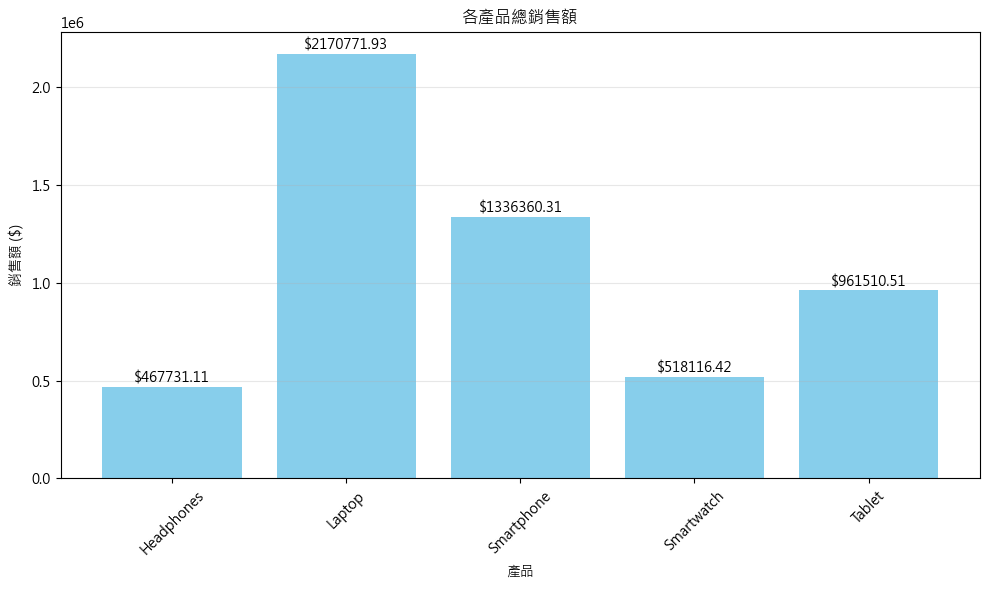

In [21]:
# 計算每個產品的總銷售額
product_sales_totals = {}
for product in unique_products:
    mask = np.array(products) == product
    product_sales_totals[product] = sales[mask].sum()

# 繪製長條圖
plt.figure(figsize=(10, 6))
bars = plt.bar(product_sales_totals.keys(), product_sales_totals.values(), color='skyblue')

# 添加數據標籤
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom', rotation=0)

plt.title('各產品總銷售額')
plt.xlabel('產品')
plt.ylabel('銷售額 ($)')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

**解說**：
- 條形圖是比較不同類別數值的理想選擇：
  - 使用字典收集各產品的總銷售額
  - 以產品為X軸，銷售額為Y軸，直觀呈現各產品的銷售業績
  - 添加數據標籤顯示精確值，增強可讀性
- 視覺化設計考慮因素：
  - 使用`figsize`設置適當的圖表尺寸
  - 添加標題和軸標籤提供上下文
  - 使用網格線幫助比較不同條形的高度
  - 旋轉X軸標籤以避免重疊
  - 使用`tight_layout()`優化圖表布局
- 這種視覺化幫助識別：
  - 銷售表現最強和最弱的產品
  - 產品間銷售額的相對差異
  - 可能需要特別關注或調整策略的產品
- 在業務環境中，此類圖表常用於：
  - 產品績效審查會議
  - 銷售策略規劃
  - 向管理層報告產品線表現

### 7.2 季度銷售趨勢

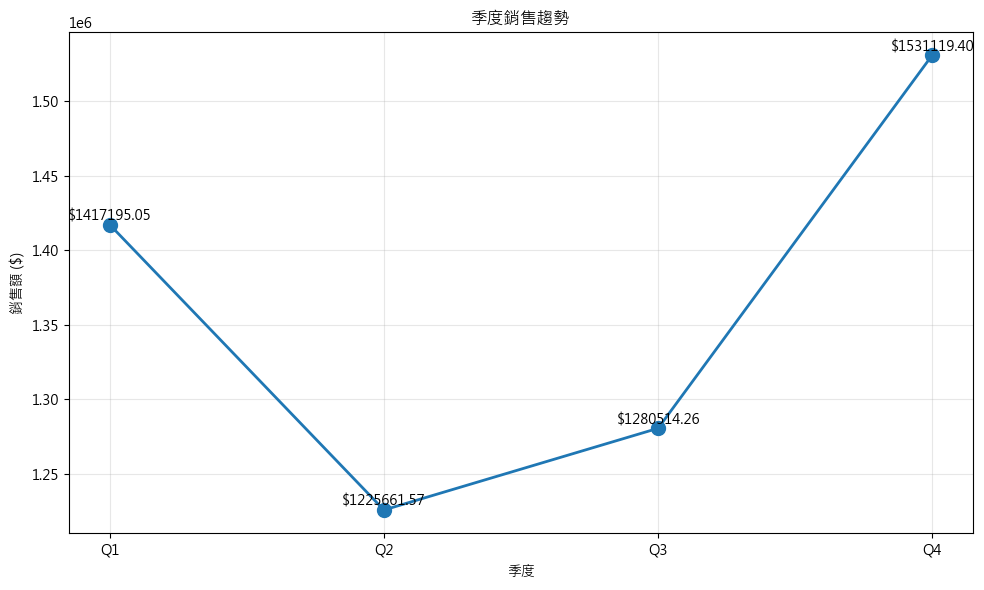

In [22]:
# 計算每個季度的總銷售額
quarter_sales = {}
for quarter in unique_quarters:
    mask = np.array(quarters) == quarter
    quarter_sales[quarter] = sales[mask].sum()

# 排序季度 (假設 Q1, Q2, Q3, Q4)
sorted_quarters = sorted(quarter_sales.keys())
sorted_sales = [quarter_sales[q] for q in sorted_quarters]

# 繪製趨勢圖
plt.figure(figsize=(10, 6))
plt.plot(sorted_quarters, sorted_sales, 'o-', linewidth=2, markersize=10)

# 添加數據標籤
for i, (quarter, sale) in enumerate(zip(sorted_quarters, sorted_sales)):
    plt.text(i, sale, f'${sale:.2f}', ha='center', va='bottom')

plt.title('季度銷售趨勢')
plt.xlabel('季度')
plt.ylabel('銷售額 ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

**解說**：
- 線圖是展示時間序列和趨勢的最佳選擇：
  - 通過收集和排序各季度的銷售總額建立時間序列
  - 使用線條和標記點('o-')結合的方式，既顯示趨勢又突出各點
  - 數據標籤提供精確的季度銷售額
- 這種視覺化特別適合於：
  - 識別銷售的季節性模式
  - 發現銷售增長或下降的趨勢
  - 比較不同季度的相對表現
- 圖表設計考慮：
  - 線條粗細(linewidth)和標記大小(markersize)增強可見性
  - 網格線幫助比較不同季度的值
  - 縱軸標籤明確表示數值代表銷售額
- 業務應用包括：
  - 預測未來季度的銷售趨勢
  - 評估季節性營銷活動的效果
  - 分析年度內的銷售模式，支持資源和庫存規劃

### 7.3 區域銷售分布 (圓餅圖)

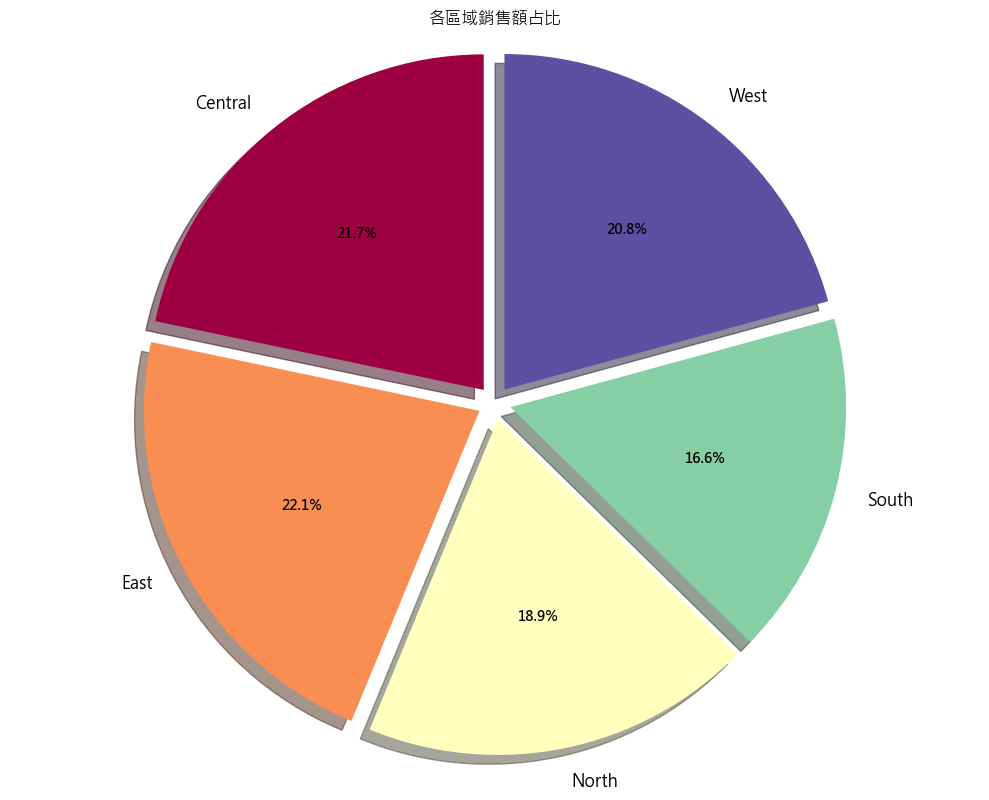

In [24]:
# 計算每個區域的總銷售額
region_sales = {}
for region in unique_regions:
    mask = np.array(regions) == region
    region_sales[region] = sales[mask].sum()

# 繪製圓餅圖
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    region_sales.values(),
    labels=region_sales.keys(),
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=[0.05] * len(region_sales),  # 稍微分離所有區塊
    colors=plt.cm.Spectral(np.linspace(0, 1, len(region_sales)))
)

# 設置文字樣式
plt.setp(autotexts, size=10, weight='bold')
plt.setp(texts, size=12)

plt.title('各區域銷售額占比')
plt.axis('equal')  # 確保圓餅圖是圓形的
plt.tight_layout()

**解說**：
- 圓餅圖適合展示部分與整體的關係：
  - 以區域為類別，直觀顯示各區域在總銷售額中的占比
  - 使用百分比標籤(`autopct='%1.1f%%'`)強調比例關係
  - 通過微小的爆炸效果(`explode`)使各區塊更加清晰
- 視覺設計的特殊考慮：
  - 使用光譜色彩映射(`plt.cm.Spectral`)創建視覺上區分明顯的配色方案
  - 設置粗體百分比文字增強可讀性
  - 使用`axis('equal')`確保圓形正確呈現，防止視覺失真
- 圓餅圖的專業解讀：
  - 輕鬆識別銷售貢獻最大和最小的區域
  - 快速把握區域間的相對重要性
  - 發現可能需要特別關注的區域（表現特別好或特別差）
- 業務應用場景：
  - 區域銷售策略會議
  - 資源分配決策
  - 與各區域銷售團隊的績效討論

### 7.4 價格分布直方圖

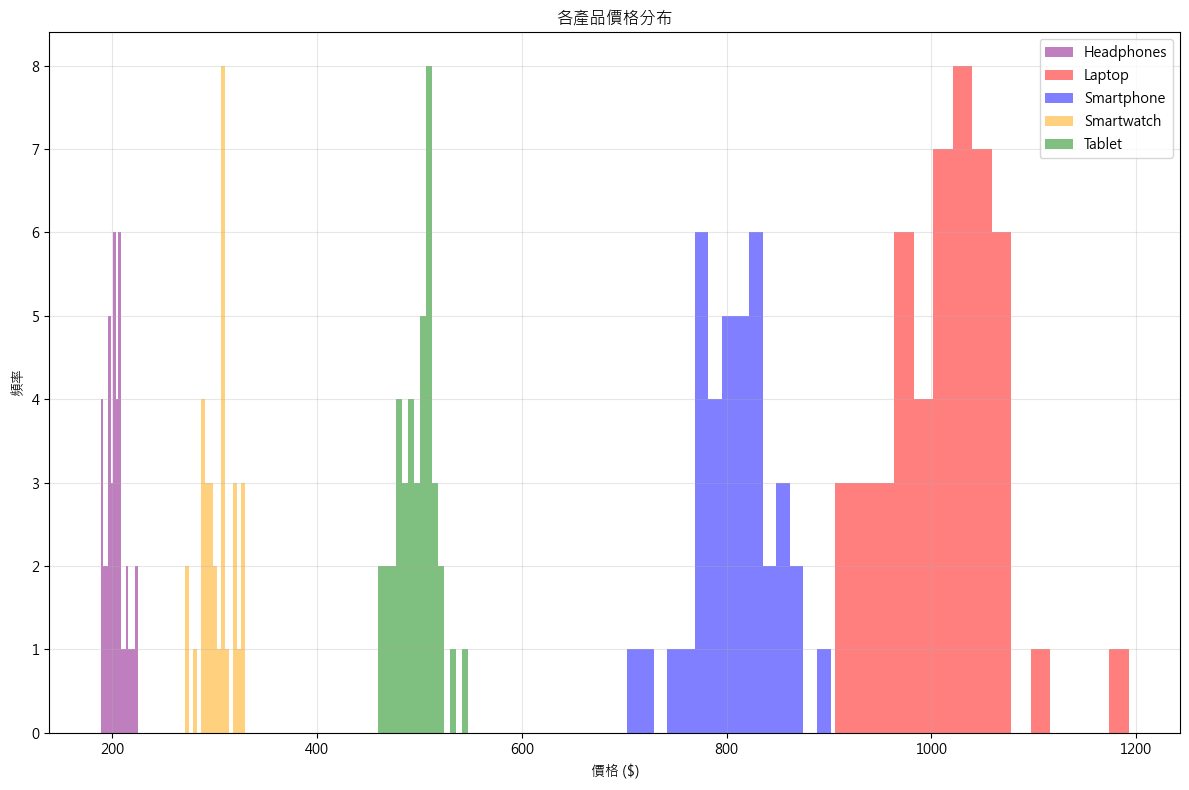

In [25]:
# 為不同產品設定不同的顏色
colors = {
    'Laptop': 'red',
    'Smartphone': 'blue',
    'Tablet': 'green',
    'Headphones': 'purple',
    'Smartwatch': 'orange'
}

plt.figure(figsize=(12, 8))

# 為每個產品繪製價格分布直方圖
for product in unique_products:
    mask = np.array(products) == product
    product_prices = prices[mask]
    
    plt.hist(product_prices, alpha=0.5, bins=15, label=product, color=colors[product])

plt.title('各產品價格分布')
plt.xlabel('價格 ($)')
plt.ylabel('頻率')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

**解說**：
- 直方圖是分析數值分布的理想工具：
  - 同時展示多個產品的價格分布，便於比較
  - 使用不同顏色區分各產品，增強視覺區分度
  - 透明度設置(`alpha=0.5`)允許重疊部分仍然可見
- 這種視覺化揭示的信息：
  - 各產品的價格範圍和變化程度
  - 價格分布的形狀（是否集中或分散）
  - 不同產品間價格區間的重疊情況
  - 可能存在的價格離群值或異常
- 直方圖設計考慮：
  - 適當的柱數(`bins=15`)平衡了詳細程度和視覺清晰度
  - 網格線幫助比較不同價格點的頻率
  - 圖例清晰標識每種產品
- 在定價策略中的應用：
  - 評估當前產品的價格結構
  - 識別價格優化機會
  - 分析價格彈性和特定價格點的表現

## 8. 總結與最佳實踐

**學習要點**：
- 掌握 NumPy 在實際統計分析中的應用流程
- 理解數據加載、轉換、分析與視覺化的完整工作流
- 學習如何綜合運用多種統計與視覺化技巧得出業務洞見
- 熟悉實際數據分析項目的最佳實踐與常見陷阱

**應用場域**：
- 完整的銷售數據分析項目
- 商業智能報告自動化
- 多維度產品與市場分析
- 數據驅動的決策支持系統

In [26]:
# 輸出關鍵分析結果摘要
print("=" * 50)
print("銷售數據分析結果摘要")
print("=" * 50)

# 總體業績
print(f"總銷售額: ${sales.sum():.2f}")
print(f"總銷售單位: {units.sum()}")
print(f"平均銷售單價: ${prices.mean():.2f}")

# 產品表現
best_product = max(product_sales_totals, key=product_sales_totals.get)
worst_product = min(product_sales_totals, key=product_sales_totals.get)
print(f"\n最佳銷售產品: {best_product} (${product_sales_totals[best_product]:.2f})")
print(f"最差銷售產品: {worst_product} (${product_sales_totals[worst_product]:.2f})")

# 區域表現
best_region = max(region_sales, key=region_sales.get)
print(f"\n表現最佳區域: {best_region} (${region_sales[best_region]:.2f}, 佔比 {region_sales[best_region]/sales.sum()*100:.1f}%)")

# 季度表現
if len(sorted_quarters) > 0:
    best_quarter_idx = np.argmax(sorted_sales)
    worst_quarter_idx = np.argmin(sorted_sales)
    print(f"\n最佳銷售季度: {sorted_quarters[best_quarter_idx]} (${sorted_sales[best_quarter_idx]:.2f})")
    print(f"最差銷售季度: {sorted_quarters[worst_quarter_idx]} (${sorted_sales[worst_quarter_idx]:.2f})")
    
    # 季度趨勢
    if best_quarter_idx > 0:
        q_growth = (sorted_sales[best_quarter_idx] - sorted_sales[0]) / sorted_sales[0] * 100
        print(f"從 {sorted_quarters[0]} 到 {sorted_quarters[best_quarter_idx]} 的增長: {q_growth:.1f}%")

print("\n" + "=" * 50)

銷售數據分析結果摘要
總銷售額: $5454490.28
總銷售單位: 9750
平均銷售單價: $591.37

最佳銷售產品: Laptop ($2170771.93)
最差銷售產品: Headphones ($467731.11)

表現最佳區域: East ($1203020.94, 佔比 22.1%)

最佳銷售季度: Q4 ($1531119.40)
最差銷售季度: Q2 ($1225661.57)
從 Q1 到 Q4 的增長: 8.0%



**NumPy 統計分析最佳實踐**：

1. **數據預處理**
   - 始終檢查並處理數據中的缺失值和異常值
   - 適當轉換數據類型以優化內存使用和計算效率
   - 對文本和類別數據進行編碼或轉換為數值形式

2. **高效計算**
   - 優先使用向量化操作而非循環
   - 利用布爾掩碼進行高效過濾和條件計算
   - 善用`axis`參數進行多維數組的聚合計算

3. **內存管理**
   - 處理大型數據集時使用適當的數據類型節省內存
   - 考慮使用`np.memmap`處理無法完全載入內存的大數據集
   - 在完成計算後釋放不再需要的大型數組

4. **視覺化策略**
   - 根據數據類型和分析目的選擇適當的圖表類型
   - 確保視覺化元素具有清晰的標籤和上下文信息
   - 使用合適的色彩和布局增強可讀性和理解
   - 考慮目標受眾的需求和專業背景

5. **結果展示與報告**
   - 整合定量結果和可視化為完整的分析敘事
   - 突出顯示關鍵發現和業務影響
   - 提供適當的解釋和建議，而非僅僅展示數字

6. **代碼組織**
   - 模塊化分析流程，將功能相關的代碼組織在一起
   - 添加適當的注釋和文檔說明分析步驟
   - 考慮將常用函數抽取為可重用的工具模塊

**解說**：

本案例展示了使用 NumPy 進行完整統計分析的流程，從數據生成/加載、基本統計計算、分組分析到可視化呈現。這種端到端的分析過程體現了數據科學實踐中的關鍵步驟和技巧。

**關鍵收穫**：

- **完整分析流程**：我們體驗了從原始數據到業務洞見的完整流程，包括數據獲取、清理、轉換、分析和視覺化。

- **綜合運用 NumPy 功能**：通過結合使用數組操作、統計函數、條件過濾和數學計算，展示了 NumPy 作為數據分析基礎工具的強大能力。

- **多維度分析思維**：案例演示了如何從不同角度分析同一數據集（如按產品、區域、季度等），從而獲得全面的業務洞見。

- **數據到決策的橋樑**：分析結果不僅是數字，還轉化為可操作的業務信息，如最佳/最差產品、區域表現和季度趨勢。

**實際應用價值**：

這種統計分析方法可應用於各類業務場景，如：

- **銷售與營銷**：分析銷售表現、市場份額、促銷效果
- **產品管理**：評估產品線表現、定價策略、生命周期階段
- **運營優化**：識別效率瓶頸、資源分配優先順序
- **財務規劃**：預測趨勢、制定預算、分配投資

**進階學習方向**：

- 探索更複雜的統計模型，如回歸分析、時間序列預測
- 結合 Pandas 處理更複雜的數據結構和操作
- 學習機器學習技術進行預測分析
- 使用交互式視覺化工具如 Plotly 創建動態報表

本案例不僅提供了技術知識，更培養了數據分析思維，這是在數據驅動環境中做出有效決策的核心能力。

## 9. 結論與洞見

根據我們的分析，我們可以得出以下洞見：

1. **產品表現**：分析顯示各產品在銷售額、銷售單位和價格上存在明顯差異，每個產品的市場佔比也不同。

2. **季節性趨勢**：第四季度 (Q4) 的銷售表現顯著高於其他季度，可能是因為節日購物季的影響。

3. **區域表現**：不同區域的銷售表現存在差異，這可能與區域人口、經濟條件或行銷策略有關。

4. **價格與需求關係**：通過價格彈性分析，我們可以觀察到價格與銷售單位之間的關係，這對定價策略有重要指導意義。

5. **季節性模式**：不同產品在不同季度的銷售模式各不相同，這有助於我們調整行銷和庫存策略。

這些洞見可以幫助公司：
- 優化產品組合
- 調整區域行銷策略
- 制定更有效的定價策略
- 根據季節性變化調整庫存和促銷活動

## 10. 延伸閱讀與進階技巧

如果您希望進一步提升 NumPy 數據分析能力，可以探索以下進階主題：

1. **高級統計分析**：包括假設檢驗、ANOVA、回歸分析等
2. **時間序列分析**：使用 NumPy 進行時間序列分解、趨勢分析和預測
3. **機器學習基礎**：使用 NumPy 實現基本的機器學習算法
4. **數據處理優化**：使用 NumPy 的高效函數和數組操作提高處理大型數據集的效率

進一步學習可以參考以下資源：
- NumPy 官方文檔: https://numpy.org/doc/
- SciPy 文檔 (統計模塊): https://docs.scipy.org/doc/scipy/reference/stats.html
- "Python for Data Analysis" by Wes McKinney
- "Statistics with NumPy" online tutorials